**Question:** A textbook has m typos, each of which is scattered randomly across n pages. Each typo's location is independent of the others. What is the probability that a random page will have no typos?

**Answer:** It's easier to understand this intuitively if you chose one of the n pages first, then have the m typos fall randomly on any one of the n pages. The probability that a given typo will land on your page is $\frac{1}{n}$. The probability that the same typo will, instead, land on any one of the other pages is $1 - \frac{1}{n}$. Because where the typos end up is independent of the other typo's location, the probability that all m typos miss your page is then $(1 - \frac{1}{n})^m$

Suppose there were 20 pages and 30 typos. This probability is around 0.2146. We can confirm this with a simple simulation below:

In [41]:
import random
import numpy as np
import matplotlib.pyplot as plt
import scipy.stats as stats

In [60]:
n = 20  # num. pages
m = 30  # num. of typos
iterations = 100000

share_no_typo_list = []

for v in xrange(iterations):

    pg = [x for x in range(1,n+1)]  # list containing pages
    random.choice(pg)
    pg_w_typo = [random.choice(pg) for _ in range(m)]  # pages with typos on it

    pg_w_typo_set = [x for x in set(pg_w_typo)]  # turn list to a set
    pg_no_typo = [x for x in pg if x not in pg_w_typo_set]  # pages without a typo
    share_no_typo = float(len(pg_no_typo)) / n

    # the pages in which the m typos are in (assuming they land in a page randomly)
    share_no_typo_list.append(share_no_typo)
    
# print share_no_typo_list
print "The mean share from 100000 iterations is around %.4f" % np.mean(share_no_typo_list)

The mean share from 100000 iterations is around 0.2149


Let's look at the distribution generated by the result of the simulation, which should look normal by the Central Limit Theorem.

<IPython.core.display.Javascript object>


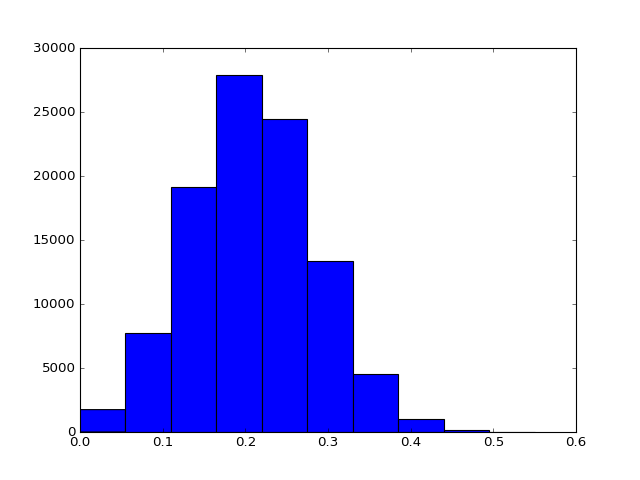

In [61]:
%matplotlib notebook
plt.hist(share_no_typo_list)
plt.show()

Just for fun, let's do a 1-sided t-test comparing the sample mean with the true mean given by the analytical solution (for n=20, m=30). The null is that the sample mean is equal to the true mean. Let's use 5% as the threshold value for rejecting the null. 

In [62]:
# test for difference in means
one_sample = stats.ttest_1samp(a = share_no_typo_list, popmean = 0.2146)
print "t-stat: %.5f, p-value: %.5f" % one_sample 

t-stat: 1.25119, p-value: 0.21087


The test fails to reject the null hypothesis that the sample mean is equal to the true mean so we can be confident that our answer to the question is correct!